In [2]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [3]:
# Define the directory where the dataset is stored
dataset_dir = "E:\IndianTrafficImageSign"

In [4]:
# Generate synthetic data for training (replace this with real data later)
X = np.random.rand(500, 64, 64, 3)  # 500 samples of 64x64 RGB images
y = np.random.randint(0, 3, 500)    # 3 classes: 0, 1, 2

In [5]:
# Convert labels to one-hot encoding
y = to_categorical(y, 3)


In [6]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    rescale=1./255  # Normalize pixel values
)
datagen.fit(X_train)

In [8]:
# Define a CNN model with Dropout
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),
    Dropout(0.25),  # Dropout layer
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')  # 3 classes for traffic signs
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
# Save the best model during training
checkpoint = ModelCheckpoint('best_traffic_sign_model.keras', monitor='val_accuracy', save_best_only=True, verbose=1)

In [12]:
# Train the model with data augmentation
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    epochs=10,
    validation_data=(X_test / 255.0, y_test),  # Normalize validation data
    callbacks=[checkpoint]
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step - accuracy: 0.3699 - loss: 1.1006
Epoch 1: val_accuracy improved from -inf to 0.29000, saving model to best_traffic_sign_model.keras
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 221ms/step - accuracy: 0.3672 - loss: 1.1006 - val_accuracy: 0.2900 - val_loss: 1.1022
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step - accuracy: 0.3343 - loss: 1.0982
Epoch 2: val_accuracy did not improve from 0.29000
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 272ms/step - accuracy: 0.3346 - loss: 1.0984 - val_accuracy: 0.2900 - val_loss: 1.1046
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step - accuracy: 0.3576 - loss: 1.0973
Epoch 3: val_accuracy did not improve from 0.29000
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 187ms/step - accuracy: 0.3577 - loss: 1.0973 - val_accuracy: 0.2900 - val_loss: 1.1026
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step - accuracy: 0.3617 - loss: 1.0953
Epoch 4: val_accuracy did not improve from 0.29000
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 186ms/step - accuracy: 0.3614 - lo

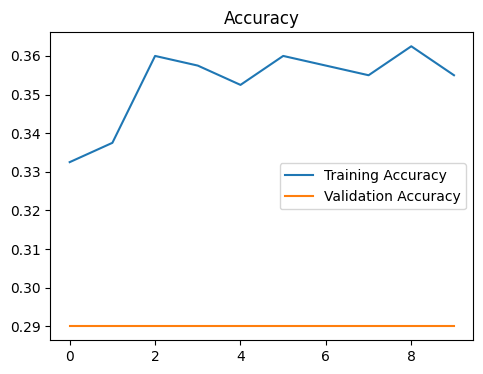

In [13]:
# Plot training and validation metrics
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

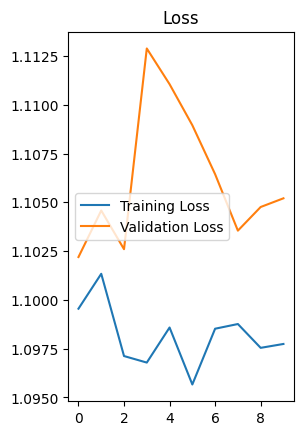

In [14]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

In [15]:
plt.show()

In [16]:
# Save the final trained model
model.save('final_traffic_sign_model.h5')